# Project: Analysis of the medical dataset “No-show apppointments” Provided by Kaggle.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### Data Assessment

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


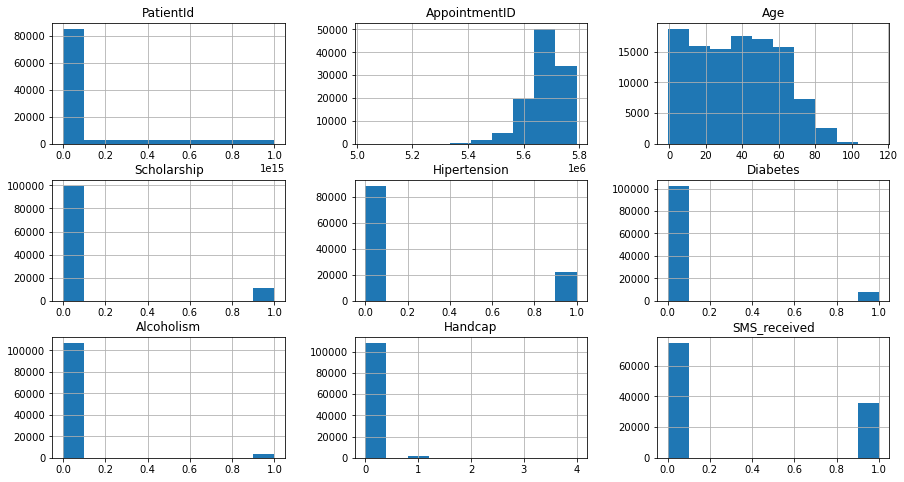

In [5]:
df.hist(figsize=(15,8));

#### Handcap's graph looks weird so lets check for weird values

In [6]:
set(df.Handcap.values)

{0, 1, 2, 3, 4}

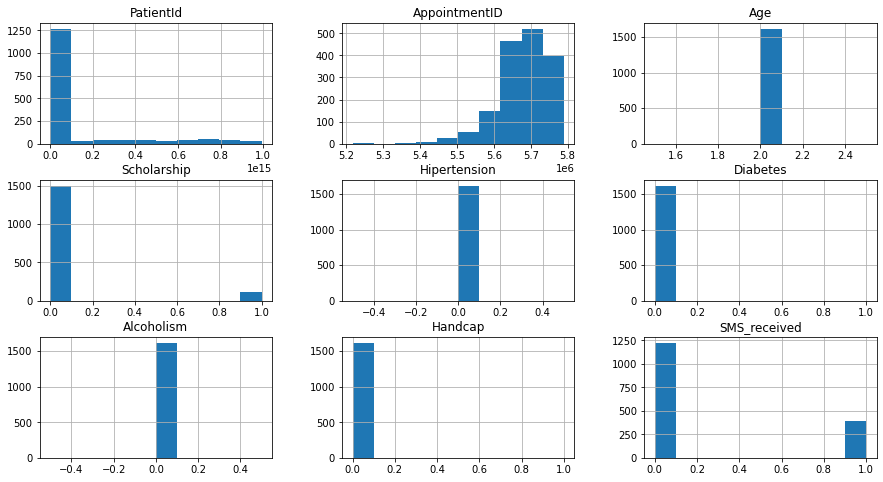

In [7]:
df.loc[df['Age']== 2].hist(figsize=(15,8)); 

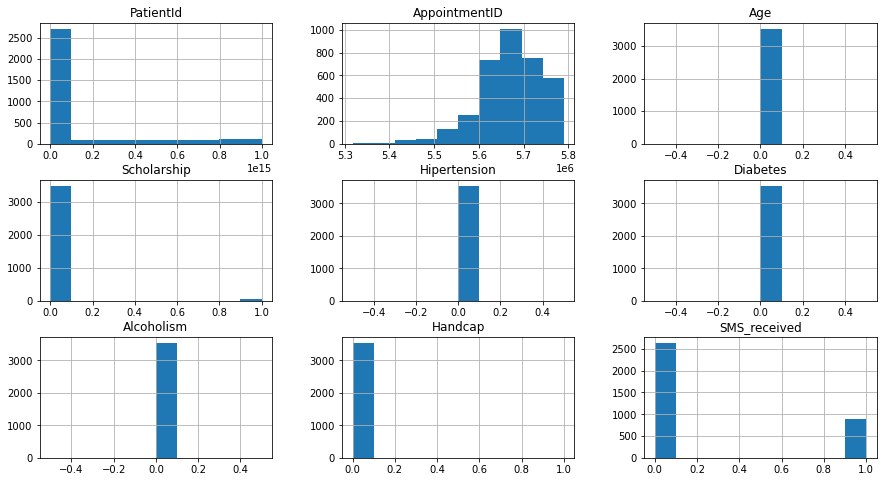

In [8]:
df.loc[df['Age']== 0].hist(figsize=(15,8)); 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
set(df['No-show'].values)

{'No', 'Yes'}

In [11]:
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No




### Data Cleaning 

##### dropping unneeded columns to reduce clutter

In [12]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood'], axis = 1, inplace = True)
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


##### dropping person with negative age number 

In [13]:
df.drop(df.loc[df['Age']==-1].index, inplace=True)
df.query('Age == -1')

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


#### Fixing the above 1 handicap value

In [14]:
df.Handcap.replace(to_replace =(2,3,4,5),
                 value =1,inplace= True)
df.query('Handcap > 1')

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [15]:
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


#### make a new row with total number of conditions

In [16]:
Total_conds =  df.Hipertension + df.Diabetes + df.Alcoholism + df.Handcap

df.insert(6, "Total_conditions",Total_conds , True)
df.drop(['Hipertension' , 'Diabetes' , 'Alcoholism' , 'Handcap'], axis = 1, inplace = True)

In [17]:
df.Total_conditions.value_counts()

0    84114
1    18123
2     7658
3      618
4       13
Name: Total_conditions, dtype: int64

#### The number of people with four conditions is statistically insignificant so we are dropping those.

In [18]:
df = df.query('Total_conditions != 4')

In [19]:
len(df.query('Total_conditions != 4')) == len(df)

True

#### change No-show column to Showed_up and change its values to True and False while being reversed due to name change

In [20]:
df.rename(columns = {'No-show' :'Showed_up'}, inplace=True)
df["Showed_up"].replace({"Yes": False, "No": True}, inplace=True)
df.head()

,Gender,Age,Scholarship,Total_conditions,SMS_received,Showed_up
0,F,62,0,1,0,True
1,M,56,0,0,0,True
2,F,62,0,0,0,True
3,F,8,0,0,0,True
4,F,56,0,2,0,True


<a id='eda'></a>
## Exploratory Data Analysis



### Does Total number of condition coorelate with showing up?

In [21]:
yes_show = df.Showed_up == True
no_show = df.Showed_up == False

In [22]:
df.Total_conditions[yes_show].mean()

0.329066418739654

In [23]:
df.Total_conditions[no_show].mean()

0.2809769213533498

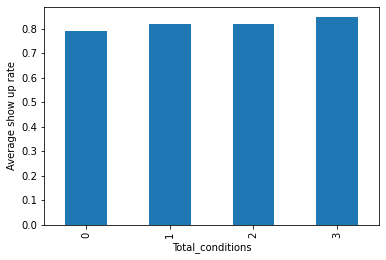

In [24]:
df.groupby('Total_conditions').Showed_up.mean().plot(kind = 'bar' ,ylabel= 'Average show up rate');

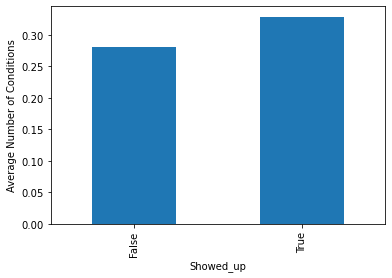

In [25]:
df.groupby('Showed_up').Total_conditions.mean().plot(kind = 'bar', ylabel='Average Number of Conditions' );

### Does SMS messages coorelate with showing up?

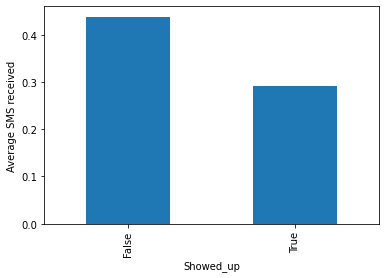

In [26]:
df.groupby('Showed_up').SMS_received.mean().plot(kind = 'bar', ylabel = 'Average SMS received' );

## Does Gender affect showing up?

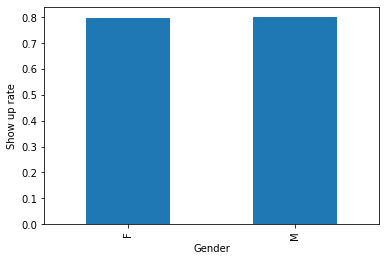

In [27]:
df.groupby('Gender').Showed_up.mean().plot(kind = 'bar',  ylabel = 'Show up rate'  );

In [28]:
df.groupby('Gender').Showed_up.mean()

Gender
F    0.796862
M    0.800336
Name: Showed_up, dtype: float64

## Does Age affect showing up?

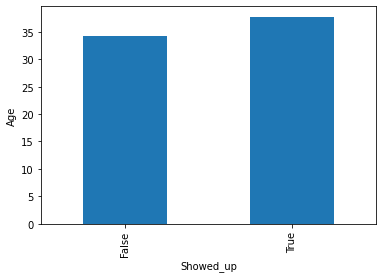

In [30]:
df.groupby('Showed_up').Age.mean().plot(kind = 'bar', ylabel = 'Age'  );

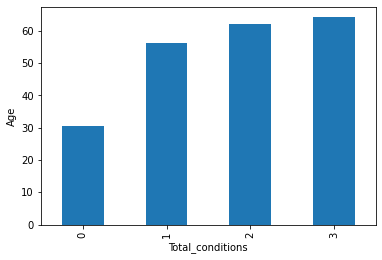

In [31]:
df.groupby('Total_conditions').Age.mean().plot(kind = 'bar', ylabel = 'Age' );

<a id='conclusions'></a>
## Conclusions

### First conclusion that the number of conditions a person has coorelate with showing up to their appointments

### Secondly I noticed that you are more likely to not show up to your appointment if you get sent SMS messages , so this either means the SMS messages are a reminder that you didn't show up to your appointment , or its a really weird finding that needs more investigation

### Third There is no significant difference between showing up for males and females as Males are about 0.3% more likely to show up than Females

### Fourth the older a person is the more likely they are to show up to their appointment, the causation here might be that aging makes you more likely to have diseases and conditions as shown in the next conclusion

### Fifth and lastly , aging coorelate with the total number of conditions you have with a very signifacnt difference as showen in graph